
# CODE TO PERFORM SIMPLE LINEAR REGRESSION




# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

# LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IMPORT DATASET

In [2]:
IceCream = pd.read_csv("IceCreamData.csv")

In [3]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685944,343.362905


In [4]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [5]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# VISUALIZE DATASET

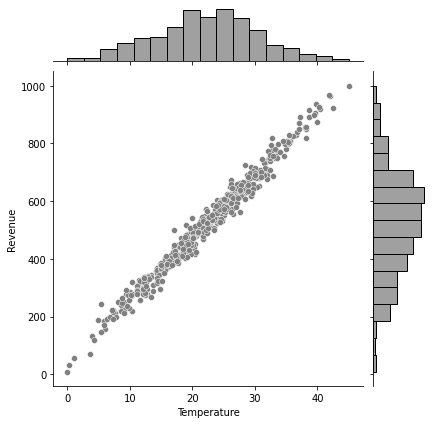

In [6]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream, color = 'gray')

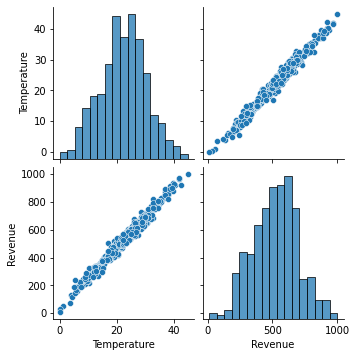

In [7]:
sns.pairplot(IceCream)

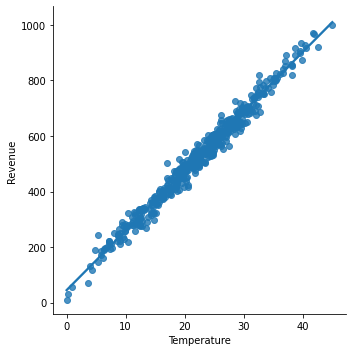

In [8]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

# CREATE TESTING AND TRAINING DATASET

In [9]:
y = IceCream['Revenue']

In [10]:
X = IceCream[['Temperature']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# TRAIN THE MODEL

In [13]:
X_train.shape

(375, 1)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.46278434]
Linear Model Coefficient (b):  44.24002309022649


In [17]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 28.9 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
# Use statsmodels to get a more detailed analysis of the regression model in Python

import statsmodels.api as sm

model = sm.OLS(y_train, X_train.assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.885e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.13e-321
Time:                        08:17:44   Log-Likelihood:                -1725.9
No. Observations:                 375   AIC:                             3456.
Df Residuals:                     373   BIC:                             3464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature    21.4628      0.156    137.280      0.000      21.155      21.770
const          44.2400      3.627     12.198      0.000      37.109      51.371
==============================================================================
Omnibus:                        3.932   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                4.667
Skew:                          -0.061   Prob(JB):                       0.0969
Kurtosis:                       3.533   Cond. No.                         67.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# TEST THE MODEL 

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test)

In [24]:
# REGRESSION METRICS

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)

MSE = mean_squared_error(y_test, y_pred)

RMSE = mean_squared_error(y_test, y_pred, squared = False)


results = pd.DataFrame([[R2, MAE, MSE, RMSE]],
               columns = ['R2', 'MAE', 'MSE', 'RMSE'])

print(results)

         R2       MAE         MSE       RMSE
0  0.976422  21.57341  745.664376  27.306856


Text(0.5, 1.0, 'Revenue Generated vs. Temperature Ice Cream Stand(Training dataset)')

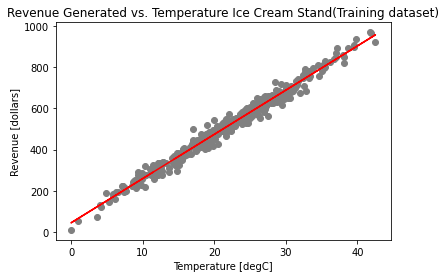

In [25]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature Ice Cream Stand(Test dataset)')

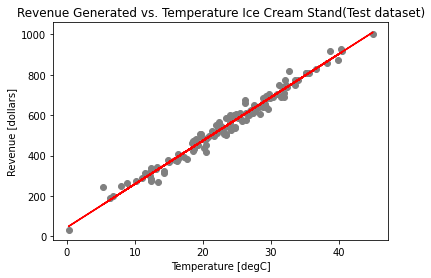

In [30]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature Ice Cream Stand(Test dataset)')

In [32]:
# revenue for Temperature = 30
T= 30
revenue = regressor.predict([[T]])
revenue

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([688.12355326])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52c36416-830a-46f9-8b9e-cd6ea1847ee2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>